
# Data Exploration : Bay Wheels System Data
## Udacity DAND: Communicate Data Findings Project
## By: Jeeva K

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

> Source:https://en.wikipedia.org/wiki/Bay_Wheels

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import datetime
import calendar
%matplotlib inline

## Gathering Data 

> Data is gathered from https://www.lyft.com/bikes/bay-wheels/system-data. The Dataset is from 2017 to 2020. But the 2019 Data alone used in this project.

> Bay wheels data is accessed and explored the user details with bike share. 

In [4]:
path = r'C:\\Users\\Jeeva\\Desktop\\Communicate Data Findings' 
files = glob.glob(os.path.join(path, "*.csv"))
bike = pd.concat((pd.read_csv(f, dtype={"bike_share_for_all_trip":object, "rental_access_method":object}) for f in files), ignore_index = True)

In [7]:
bike.shape #structure of dataset

(2506983, 15)

In [8]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [10]:
# null values in Dataset 
bike.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [11]:
bike.start_station_id.nunique()

436

In [12]:
bike.start_station_name.nunique()

446

In [13]:
bike.rental_access_method.nunique()

2

In [14]:
bike.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

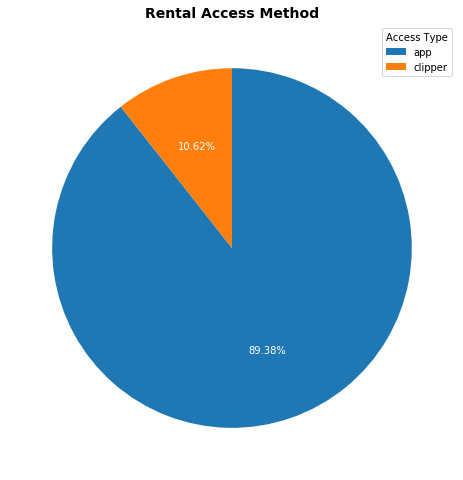

In [15]:
# the rental access method of user 
access = bike.rental_access_method.value_counts()
plt.figure(figsize=[14.70, 8.27])
plt.pie(access, labels = access.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(access.index, 
           title='Access Type', 
           loc='upper right')
plt.title('Rental Access Method', fontsize=14,  fontweight='bold');

In [16]:
bike.user_type.nunique()

2

In [17]:
bike.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

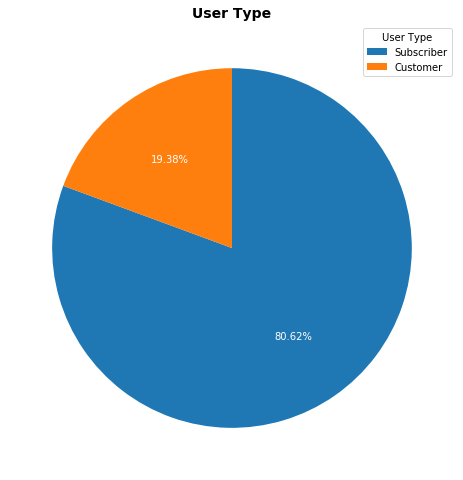

In [18]:
# user type subscriber and customer
user = bike.user_type.value_counts()
plt.figure(figsize=[14.70, 8.27])
plt.pie(user, labels = user.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(user.index, 
           title='User Type', 
           loc='upper right')
plt.title('User Type', fontsize=14,  fontweight='bold');

In [19]:
bike.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

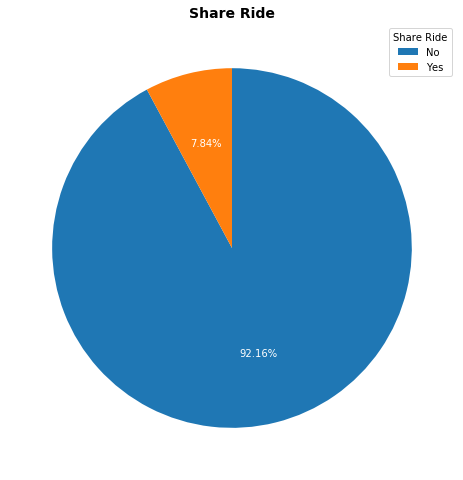

In [20]:
# The Ride share by the user
share = bike.bike_share_for_all_trip.value_counts()
plt.figure(figsize=[14.70, 8.27])
plt.pie(share, labels = share.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(share.index, 
           title='Share Ride', 
           loc='upper right')
plt.title('Share Ride', fontsize=14,  fontweight='bold');

In [21]:
# duplicates in dataset.
bike.duplicated().sum()

0

In [22]:
# copying the data to another dataframe.
bike_clean = bike.copy()

##  Data Cleaning
Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned.

- Missing values in some columns.
- Change `bike_id`, `start_station_id` and `end_station_id` to object dtype (string)
- Change `user_type`, `bike_share_for_all_trip`, and `rental_access_method` to category dtype
- Change `start_time`, and `end_time` to datetime dtype
- Add another column `duration_min` to display duration of trips in minutes
- Add another column `distance_miles` to display distance for each trip
- Add columns `start_time_month`, `start_time_weekday`, and `start_time_hour` to for better usage in data visualization later

### Change bike_id, start_station_id and end_station_id to object dtype (string)

In [23]:
# Change bike_id, start_station_id and end_station_id to object dtype (string)
cols = ['bike_id', 'start_station_id', 'end_station_id']
for c in cols:
    bike_clean[c] =  bike_clean[c].astype(str)

In [24]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         object 
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           object 
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  object 
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(4), int64(1), object(10)
memory usage: 286.9+ MB


### Change user_type, bike_share_for_all_trip, and rental_access_method to category dtype

In [25]:
# Change object to category dtype
user_classes = ['Subscriber', 'Customer']
userCls = pd.api.types.CategoricalDtype(ordered = True, categories = user_classes)
bike_clean['user_type'] = bike_clean['user_type'].astype(userCls)

bike_share_classes = ['Yes', 'No']
bikeCls = pd.api.types.CategoricalDtype(ordered = True, categories = bike_share_classes)
bike_clean['bike_share_for_all_trip'] = bike_clean['bike_share_for_all_trip'].astype(bikeCls)

rental_access_method_classes = ['app', 'clipper']
rentalCls = pd.api.types.CategoricalDtype(ordered = True, categories = rental_access_method_classes)
bike_clean['rental_access_method'] = bike_clean['rental_access_method'].astype(rentalCls)      

In [26]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   duration_sec             int64   
 1   start_time               object  
 2   end_time                 object  
 3   start_station_id         object  
 4   start_station_name       object  
 5   start_station_latitude   float64 
 6   start_station_longitude  float64 
 7   end_station_id           object  
 8   end_station_name         object  
 9   end_station_latitude     float64 
 10  end_station_longitude    float64 
 11  bike_id                  object  
 12  user_type                category
 13  bike_share_for_all_trip  category
 14  rental_access_method     category
dtypes: category(3), float64(4), int64(1), object(7)
memory usage: 236.7+ MB


### Change start_time, and end_time to datetime dtype

In [27]:
cols = ['start_time', 'end_time']
for c in cols:
    bike_clean[c] = pd.to_datetime(bike_clean[c]) 

In [28]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 236.7+ MB


### Add another column duration_min to display duration of trips in minutes

In [29]:
bike_clean['duration_min'] = bike_clean['duration_sec'].apply(lambda x: "{:.1f}".format(x/60))
bike_clean['duration_min'] = bike_clean['duration_min'].astype(float)

In [30]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  duration_min             float64       
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memor

### Add another column distance_miles to display distance for each trip by the user

In [33]:
# Fuction to calcuate distance from latitude and longitude of the ride

from math import radians, cos, sin, asin, sqrt, atan2
"""
This function is to calculate the distance between two latitude and logitude in the bike ride station.
The function calculate the distance in every row of the dataset.
"""
# function to calculate distance
def distance(origin, destination):
       
    lat1, long1 = origin
    lat2, long2 = destination
    
    radius = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
 
    dLat = radians(lat2 - lat1)
    dLong = radians(long2 - long1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = (sin(dLat / 2) * sin(dLat / 2) + cos(lat1) * cos(lat2) * sin(dLong / 2) * sin(dLong / 2))
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d = radius * c

    return d

In [34]:
bike_clean['distance_miles'] = bike_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), 
                                                                (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [35]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  duration_min             float64       
 16  distance_miles           float64       
dtypes: category(3), datetime64[

### Add columns start_time_month, start_time_weekday, and start_time_hour to for better usage in data visualization later

In [36]:
bike_clean['start_time_month'] = bike_clean.start_time.dt.strftime('%B')
bike_clean['start_time_weekday'] = bike_clean['start_time'].dt.strftime('%A')
bike_clean['start_time_hour'] = bike_clean['start_time'].dt.strftime('%H')

In [37]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,distance_miles,start_time_month,start_time_weekday,start_time_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,1347.1,3.297429,January,Thursday,17
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098.3,2.398939,January,Thursday,20
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,1043.9,2.043085,January,Thursday,18
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744.7,0.621318,January,Thursday,19
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011.8,0.592555,January,Thursday,14


In [38]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  duration_min             float64       
 16  distance_miles           float64       
 17  start_time_month         ob

In [39]:
bike_clean.to_csv(r'C:\\Users\\Jeeva\\Desktop\\Project Template\\baywheels_2019_clean.csv', index = False)

### What is the structure of your dataset?

- The struture of data is 25,06,983 rows and 20 columns.

- Each trip is anonymized and includes:
`duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude,      end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method, duration_min, distance_miles, start_time_month, start_time_weekday, start_time_hour`              

### What is/are the main feature(s) of interest in your dataset?

> The Main Interest of Dataset is to Visualize the Ride by Users in various Day, Week and Month. The more columns are created from dataset to visualize the data. The new columns like duration_min, distance_miles, start_time_month, start_time_weekday, start_time_hour are created from existing columns in dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Latitude and Longitude of the Ride shows the distance travelled by the user ride, ride time of the ride, duration of ride, and distance_miles of ride. These features in dataset help to visualize the invetigation the features.

## Univariate Exploration

> The Monthly, weekly, daily and ride time usage of the bike in bay wheels. The exploration shows the various usage of ride with day, week, month from the users bike trips.

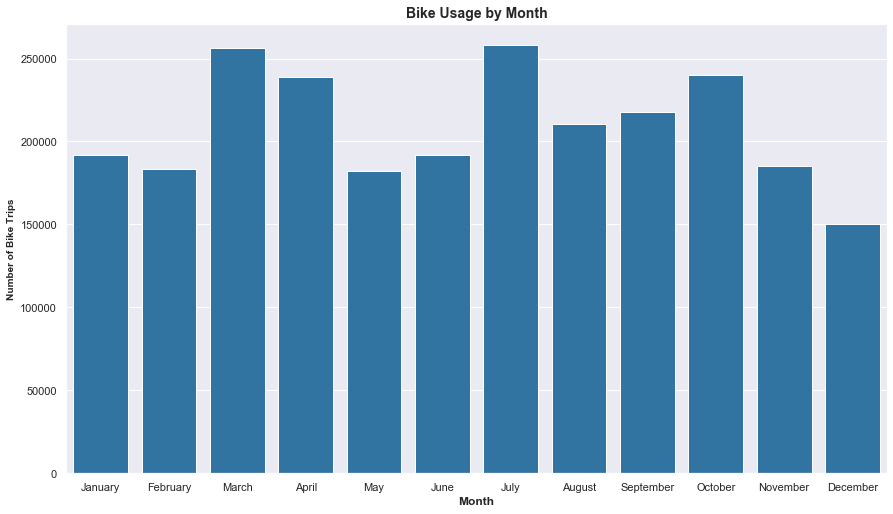

In [40]:
# Monthly usage of the Bay Wheels
base_color = sns.color_palette()[0]
sns.set(style="darkgrid")
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, x = 'start_time_month', color = base_color)
ax.set_title('Bike Usage by Month', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 10, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0);

**The monthly usage of the bay wheels bike shows that March, July are the mostly used followed by April and October. The third most highest monthy usage is August and September. The less monthly usage is December month.**

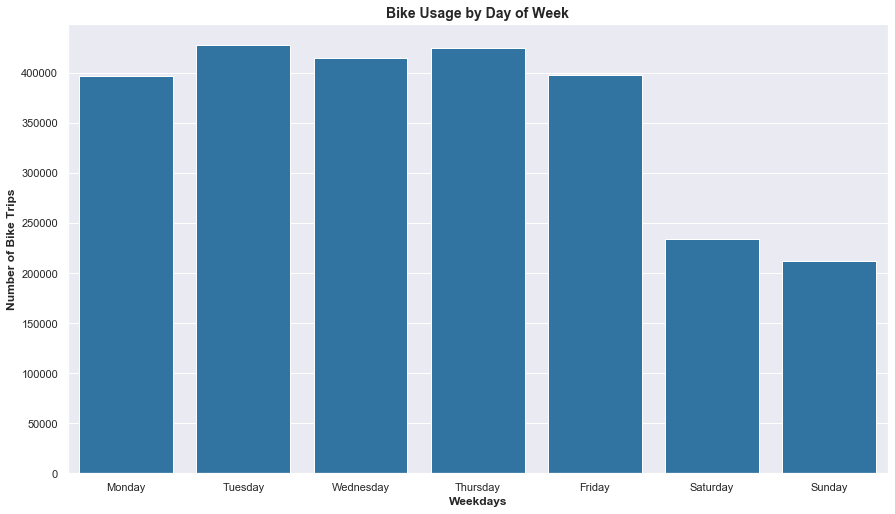

In [41]:
# Weekday usage of the Bay Wheels system
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, x = 'start_time_weekday', color = base_color, order = day_order)
ax.set_title('Bike Usage by Day of Week', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Weekdays', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

**The Weekly usage of bike ride shows that weekends usage is low. The usage during the weekdays are high** 

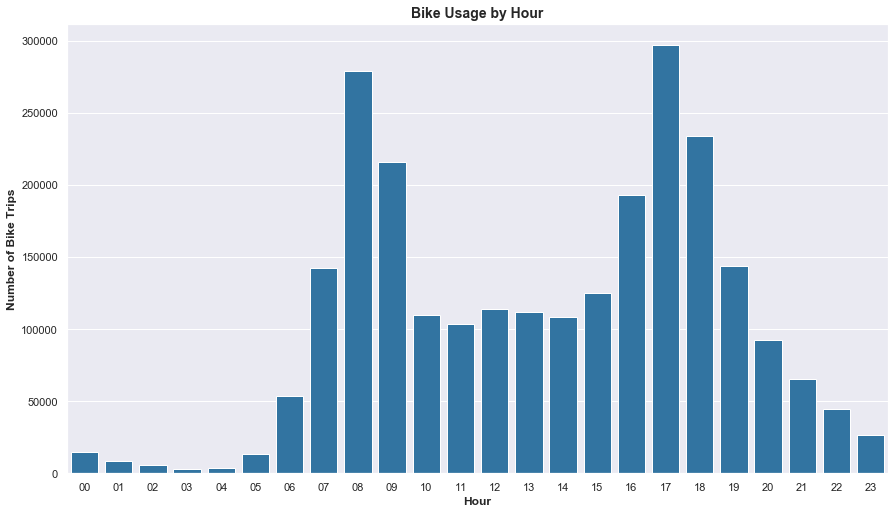

In [42]:
# Hour usage of the Bay Wheels
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, x = 'start_time_hour', color = base_color)
ax.set_title('Bike Usage by Hour', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Hour', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
ax.set_xticklabels(ax.get_xticklabels());

**The hourly bike ride shows that the maximum ride is taken on morning and evening. The morning ride time from 8AM to 9PM, evening 17PM to 19PM.**

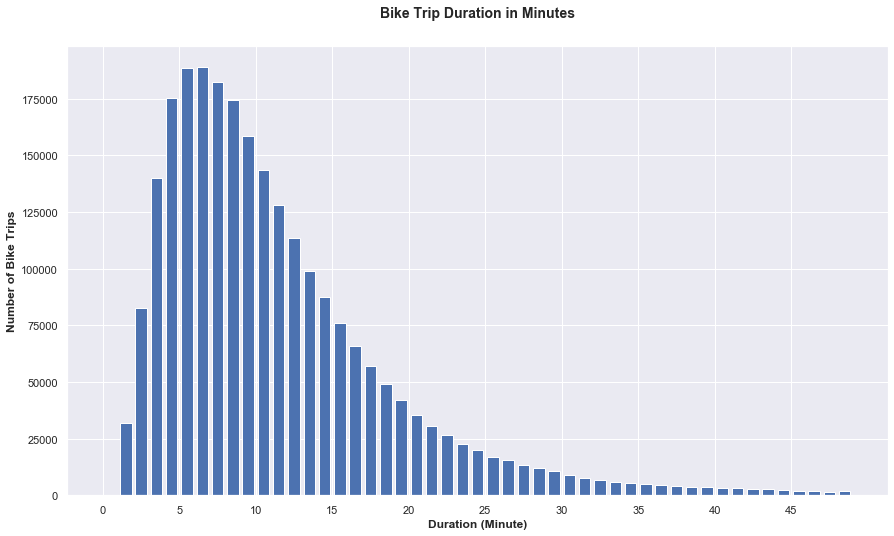

In [43]:
# Duration of the bike rides in MINUTES
bin_edges = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5).tolist()
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = bike_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.75);
plt.title("Bike Trip Duration in Minutes", y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration (Minute)', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
plt.xticks(ticks, labels);

**The maximum usage of bike ride is 7 minutes. The bin shows that the maximum ride time is 5- 10 minutes. The user communicate the ride with distance of maximum 10 minutes** 

## Bivariate Exploration

> The relation between the user type and usage by day, week and month are explorated.

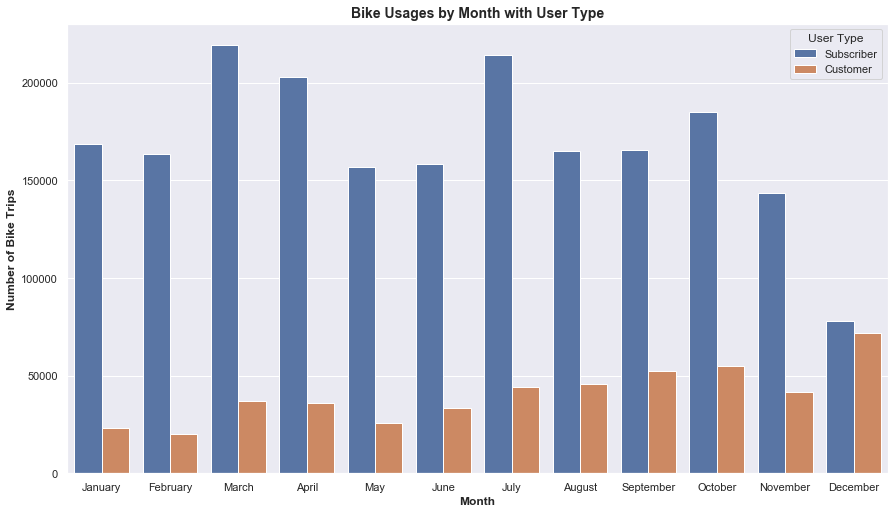

In [44]:
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, 
                   x = 'start_time_month', 
                   hue='user_type')
ax.set_title('Bike Usages by Month with User Type', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='User Type');

**The relation between user type and monthly usage shows subscribed user rides more frequently than the customer. The highest usage is during march, july and lowest during december by subscribed user whereas the customer usage is highest during december. **

In [45]:
bike_clean_week_usage = bike_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
bike_clean_week_usage.rename(columns={0:'number_of_trips'}, inplace=True)
bike_clean_week_usage

,start_time_weekday,user_type,number_of_trips
0,Friday,Subscriber,321340
1,Friday,Customer,75944
2,Monday,Subscriber,329934
3,Monday,Customer,66529
4,Saturday,Subscriber,161665
5,Saturday,Customer,72705
6,Sunday,Subscriber,147561
7,Sunday,Customer,64743
8,Thursday,Subscriber,354081
9,Thursday,Customer,70393


In [46]:
bike_clean_week_usage.shape

(14, 3)

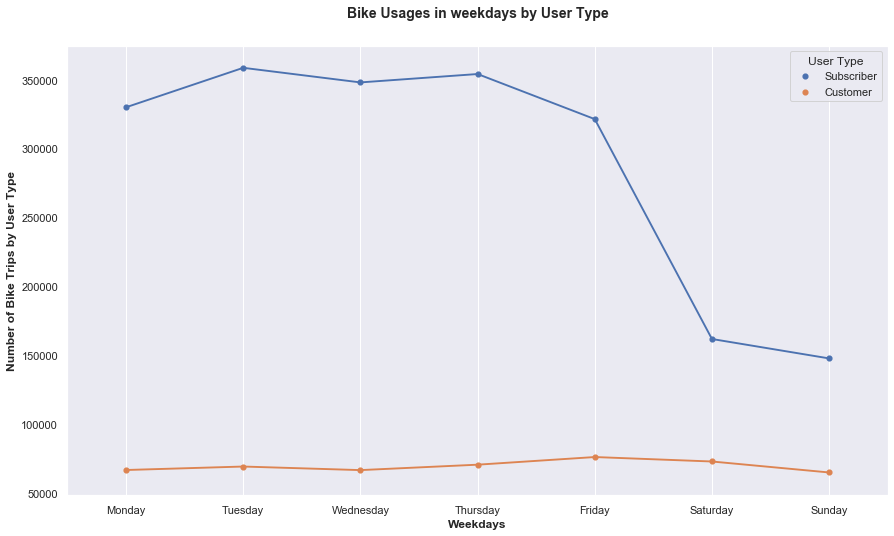

In [47]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
ax = sns.pointplot(data = bike_clean_week_usage, x = 'start_time_weekday', y = 'number_of_trips', 
                   hue = 'user_type', scale=.7, order = day_order);
plt.title('Bike Usages in weekdays by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Weekdays', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips by User Type', fontsize = 12, weight = "bold")
plt.legend(title = 'User Type')
plt.grid();

**The relation between user type and weekly usage shows subscribed user rides more frequently during weekdays and less during weekends. The weekly usage of customer remains consistent throughout the week.**

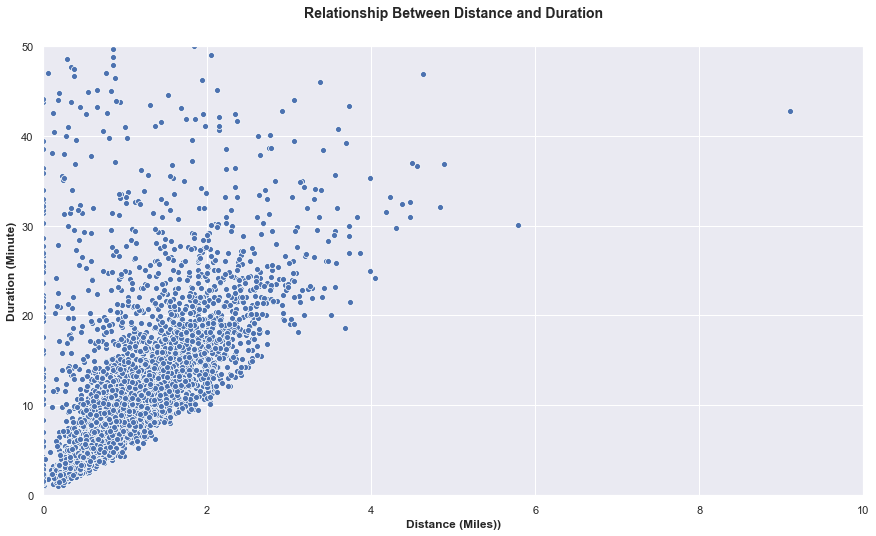

In [48]:
plt.figure(figsize=[14.70, 8.27])
sns.scatterplot(data=bike_clean.sample(5000), x='distance_miles', y='duration_min')
plt.xlim(0, 10)
plt.ylim(0, 50);
plt.title('Relationship Between Distance and Duration', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Distance (Miles))', fontsize = 12, weight = "bold")
plt.ylabel('Duration (Minute)', fontsize = 12, weight = "bold");

**The relation between distance and duration shows ride duration is higher with respect to distance. The most frequent ride distance are within three miles and 30 minutes duration.**

**From the bivariate exploration it is found that subscribed users uses more trips when compared to customer. The subscribed users trip are more during weekdays than weekends but customer usage is consistant.**

## Multivariate Exploration

> The relation between user type and usage of rides during various months is shown below.

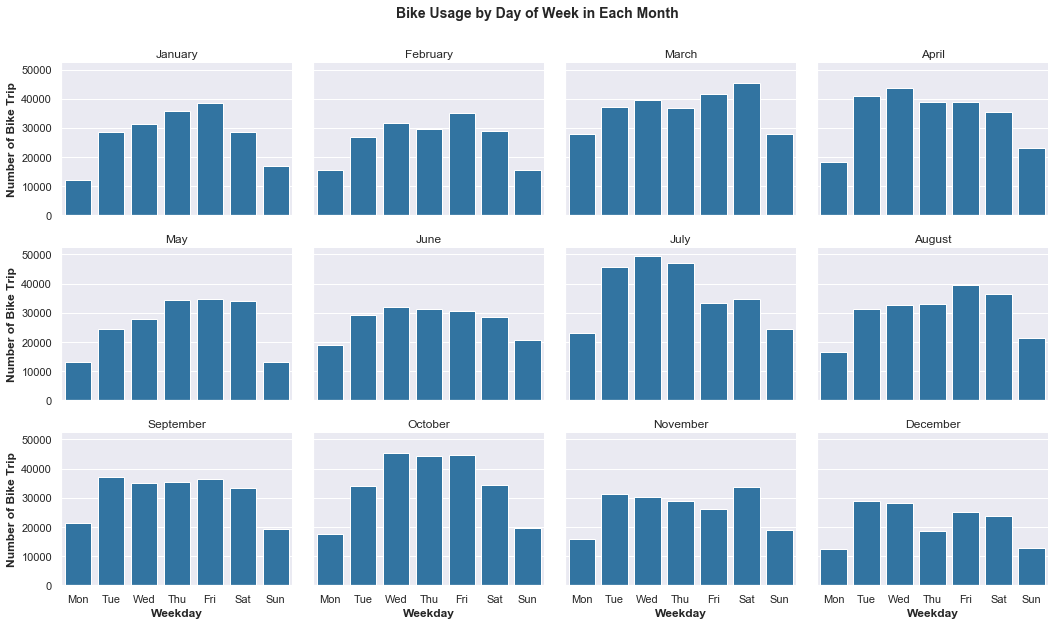

In [49]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
g = sns.FacetGrid(data = bike_clean, col = 'start_time_month', col_wrap = 4, height = 8.27/3,  aspect = (14.70/4)/(8.27/3))
g.map(sns.countplot, 'start_time_weekday',  color = base_color, order = day_order)
g.set_titles('{col_name}')
g.set_xlabels('Weekday', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.set(xticklabels=list(calendar.day_abbr))
g.fig.suptitle('Bike Usage by Day of Week in Each Month', y=1.05, fontsize=14, fontweight='bold')
g.set_xticklabels(rotation=0);

**The relation between user type and monthly usage shows subscribed user rides more frequently than the customer. The highest usage is during march, july and lowest during december by subscribed user whereas the customer usage is highest during december. **

C:\Users\Jeeva\Anaconda\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


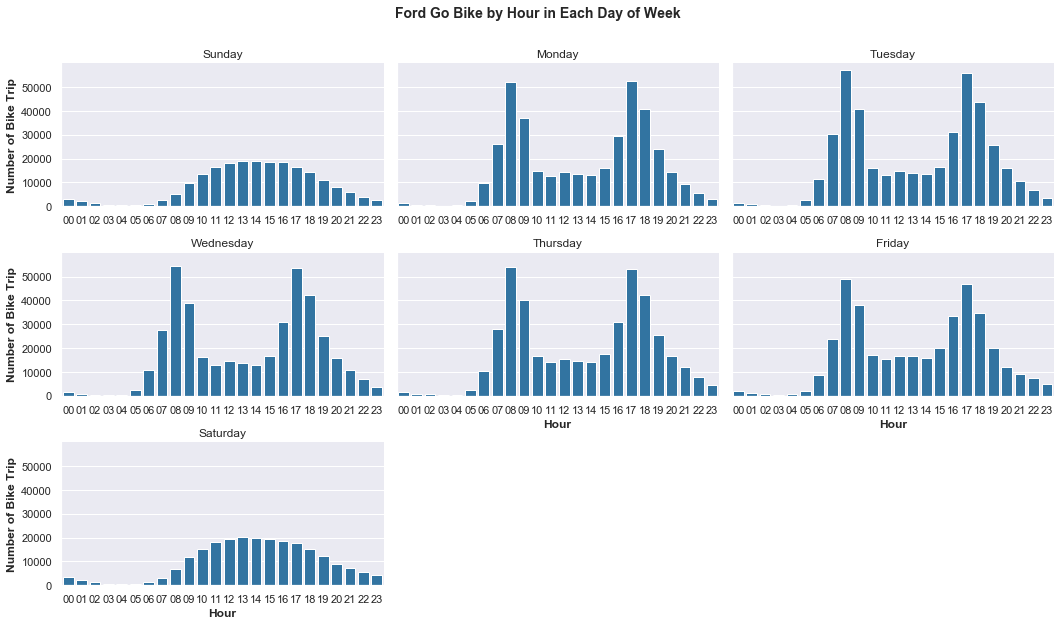

In [50]:
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dayClasses = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
bike_clean['start_time_weekday'] = bike_clean['start_time_weekday'].astype(dayClasses)

g = sns.FacetGrid(data = bike_clean, col = 'start_time_weekday', col_wrap = 3, height = 8.27/3,  aspect = (14.70/3)/(8.27/3), sharex = False)
g.map(sns.countplot, 'start_time_hour',  color = base_color)
g.set_titles('{col_name}')
g.set_xlabels('Hour', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.fig.suptitle('Ford Go Bike by Hour in Each Day of Week', y=1.05, fontsize=14, fontweight='bold');

**The hourly bike ride shows that the maximum ride is taken on morning and evening. The morning ride time from 8AM to 9PM, evening 17PM to 19PM.*

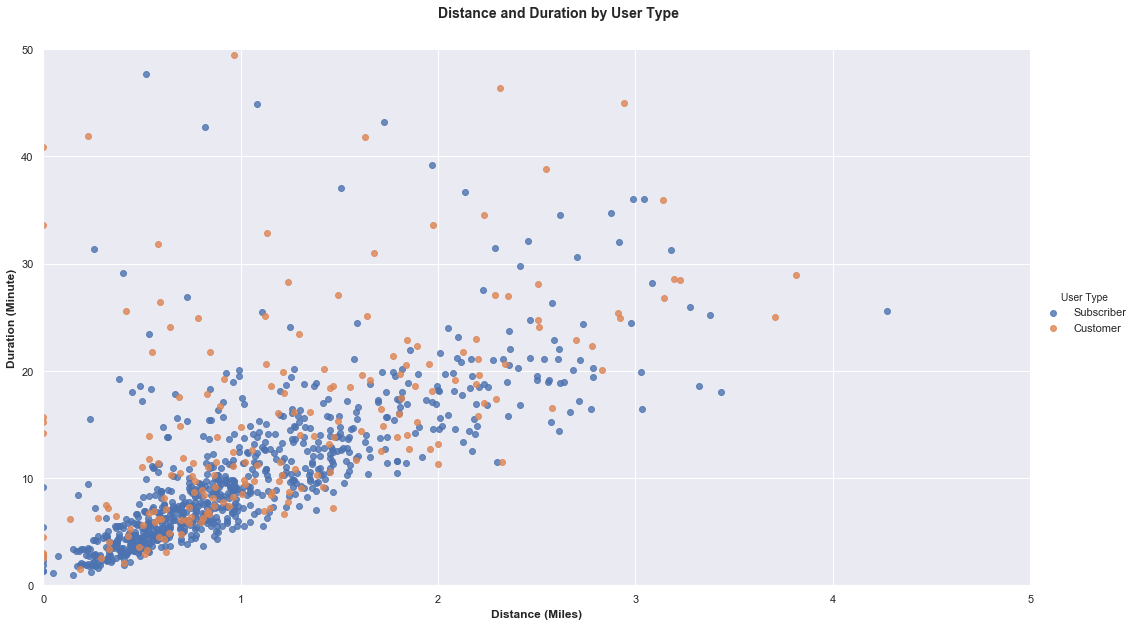

In [51]:
g = sns.FacetGrid(data=bike_clean.sample(1000), hue='user_type', height = 8.27,  aspect = 14.70/8.27)
g.map(sns.regplot, 'distance_miles', 'duration_min', fit_reg=False)
g.add_legend(title = 'User Type')
g.fig.suptitle('Distance and Duration by User Type', fontsize = 14, weight = "bold", y=1.05)
g.set_xlabels('Distance (Miles)', fontsize = 12, weight = "bold");
g.set_ylabels('Duration (Minute)', fontsize = 12, weight = "bold");
plt.xlim(0, 5)
plt.ylim(0, 50);

**The usage by both Subscribed user and customer with distance shows that the subscriber travelled more than the customer**

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## CONCLUSION
> Bay area dataset exploration shows that 

- There are two types of users subscribers and customers.
- Subscribers use frequently to commute during weekdays around 8AM-9AM and 5PM-7PM.
- Customers use to explore the city during weekends and they are occational riders.
- Subscribers are the most frequent riders throughout the year.
